In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 20

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'tomato/train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 10000 files belonging to 10 classes.


In [4]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'tomato/val',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1000 files belonging to 10 classes.


In [10]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [11]:
len(dataset)

313

In [7]:
len(val_dataset)

32

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


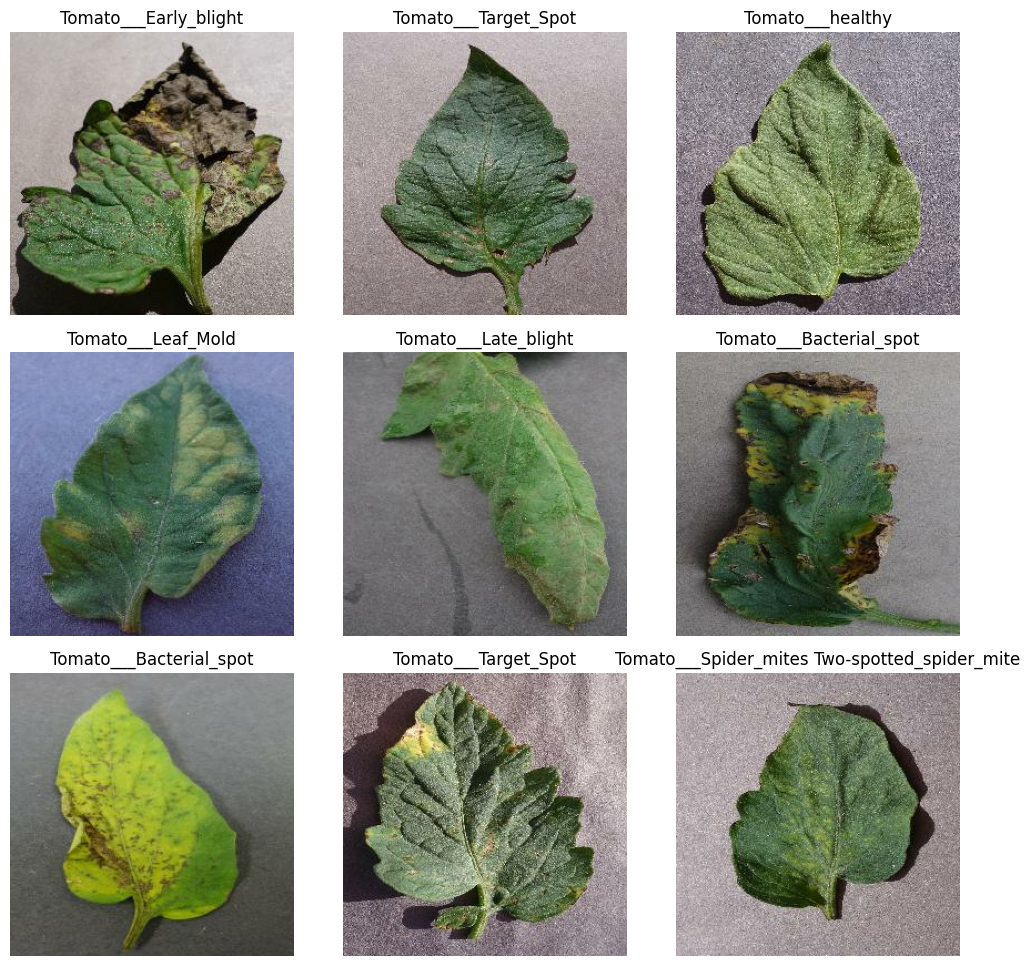

In [30]:
plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1);
        plt.tight_layout()
        plt.imshow(image_batch[i].numpy().astype('uint8'));
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        print(image_batch[0].shape)

In [36]:
num = 313 * 0.9
num

281.7

In [37]:
train_ds = dataset.take(281)
len(train_ds)

281

In [39]:
test_ds = dataset.skip(281)
len(test_ds)

32

In [40]:
val_ds = val_dataset
len(val_ds)

32

In [47]:
def get_dataset_partitions_tf(ds,train_split = 0.9,test_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    return train_ds,test_ds

In [48]:
train_ds,test_ds = get_dataset_partitions_tf(dataset)
val_ds = val_dataset

In [49]:
len(train_ds)

281

In [50]:
len(test_ds)

32

In [51]:
len(val_ds)

32

In [52]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [53]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [54]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [55]:
n_classes = 10

In [56]:
# Create the model 
input_size = (IMAGE_SIZE,IMAGE_SIZE,CHANNEL)

model = models.Sequential([
    layers.InputLayer(input_shape = input_size),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'softmax')
])

C:\Users\notebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        46,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,194 (832.79 KB)

 Trainable params: 213,194 (832.79 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics= ['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 307s 951ms/step - accuracy: 0.2345 - loss: 2.0267 - val_accuracy: 0.4770 - val_loss: 1.5243
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.5911 - loss: 1.1550 - val_accuracy: 0.7060 - val_loss: 0.8404
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.7229 - loss: 0.7967 - val_accuracy: 0.5630 - val_loss: 1.5573
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 275s 980ms/step - accuracy: 0.7732 - loss: 0.6441 - val_accuracy: 0.7120 - val_loss: 1.0114
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 280s 998ms/step - accuracy: 0.8362 - loss: 0.4596 - val_accuracy: 0.7560 - val_loss: 0.7373
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.8696 - loss: 0.3832 - val_accuracy: 0.8370 - val_loss: 0.4844
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.8817 - loss: 0.3353 - val_accuracy: 0.7590 - val_loss: 0.8284
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.8984 - loss: 0.2931 -

In [60]:
scores = model.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 448ms/step - accuracy: 0.9326 - loss: 0.2046


In [61]:
scores

[0.24212364852428436, 0.919921875]

In [62]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 281}

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

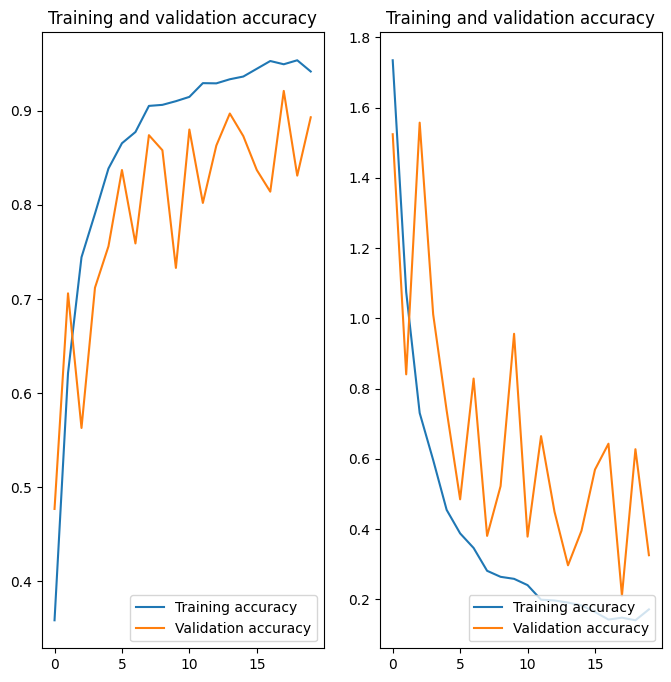

In [64]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training accuracy')
plt.plot(range(EPOCHS),val_loss,label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')
plt.show()

First image to predict
Actual label:  Tomato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
Tomato___Early_blight


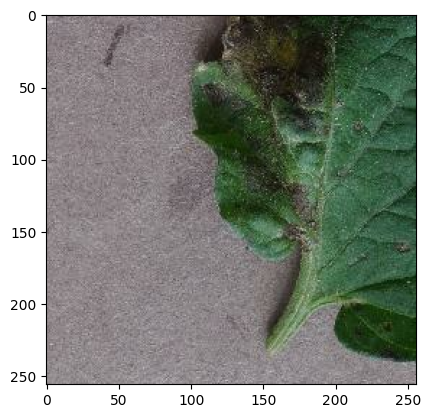

In [65]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])

    batch_Prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_Prediction[0])])

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch

    prediction = model.predict(img_array)

    predictions = class_names[np.argmax(prediction[0])]
    
    confidence = round(100 * (np.max(prediction[0])),2)
    return predictions,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


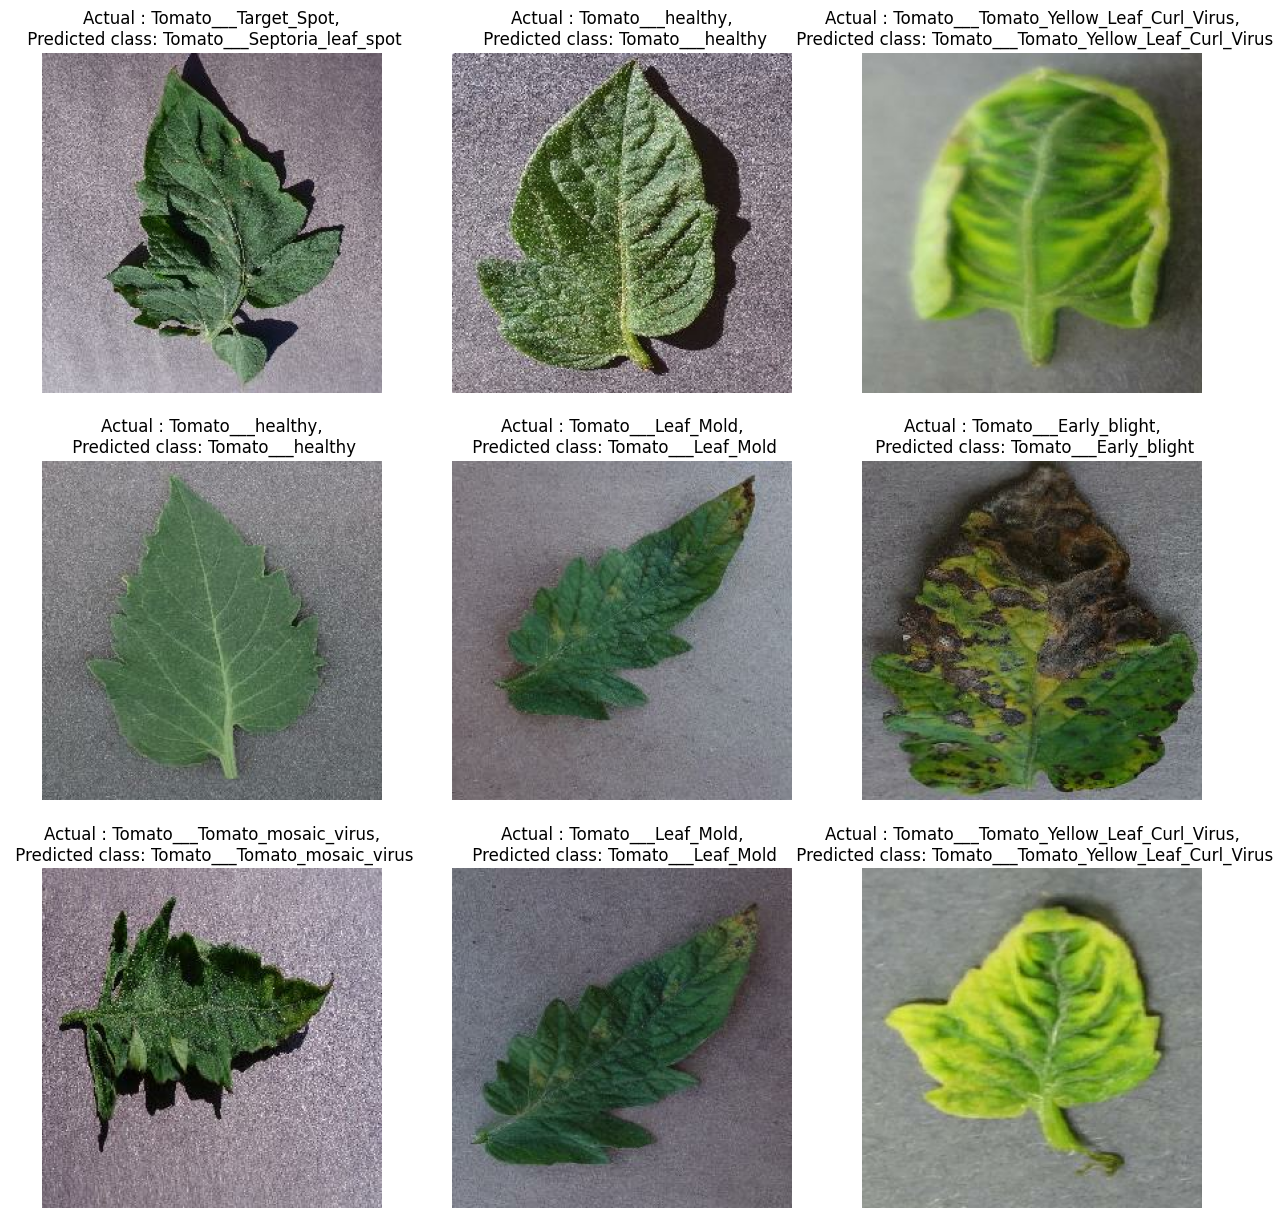

In [67]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predict_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted class: {predict_class}")
        plt.axis("off")

In [68]:
import os

# Define the path where you want to save the model
model_version = 1
save_dir = r"C:\Users\notebook\learn python\neu\CNN\tomato_disease\model\keras.1"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, f"{model_version}.keras"))
print("saved")

saved
